<a href="https://colab.research.google.com/github/SageCas/Money-Expense-Report/blob/main/Anova_(First_Job_and_age_of_first_drink)1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Is there an association between a person's first job type and the age of their first drink (alcohol) ?**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
pip install researchpy

In [ ]:
import researchpy as rp

In [ ]:
import pandas as pd
url='https://drive.google.com/file/d/1IbHzUMYKFBkmW3TIvryP7XJlW-WkmGEw/view?usp=sharing'
path= 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
df.head(5)

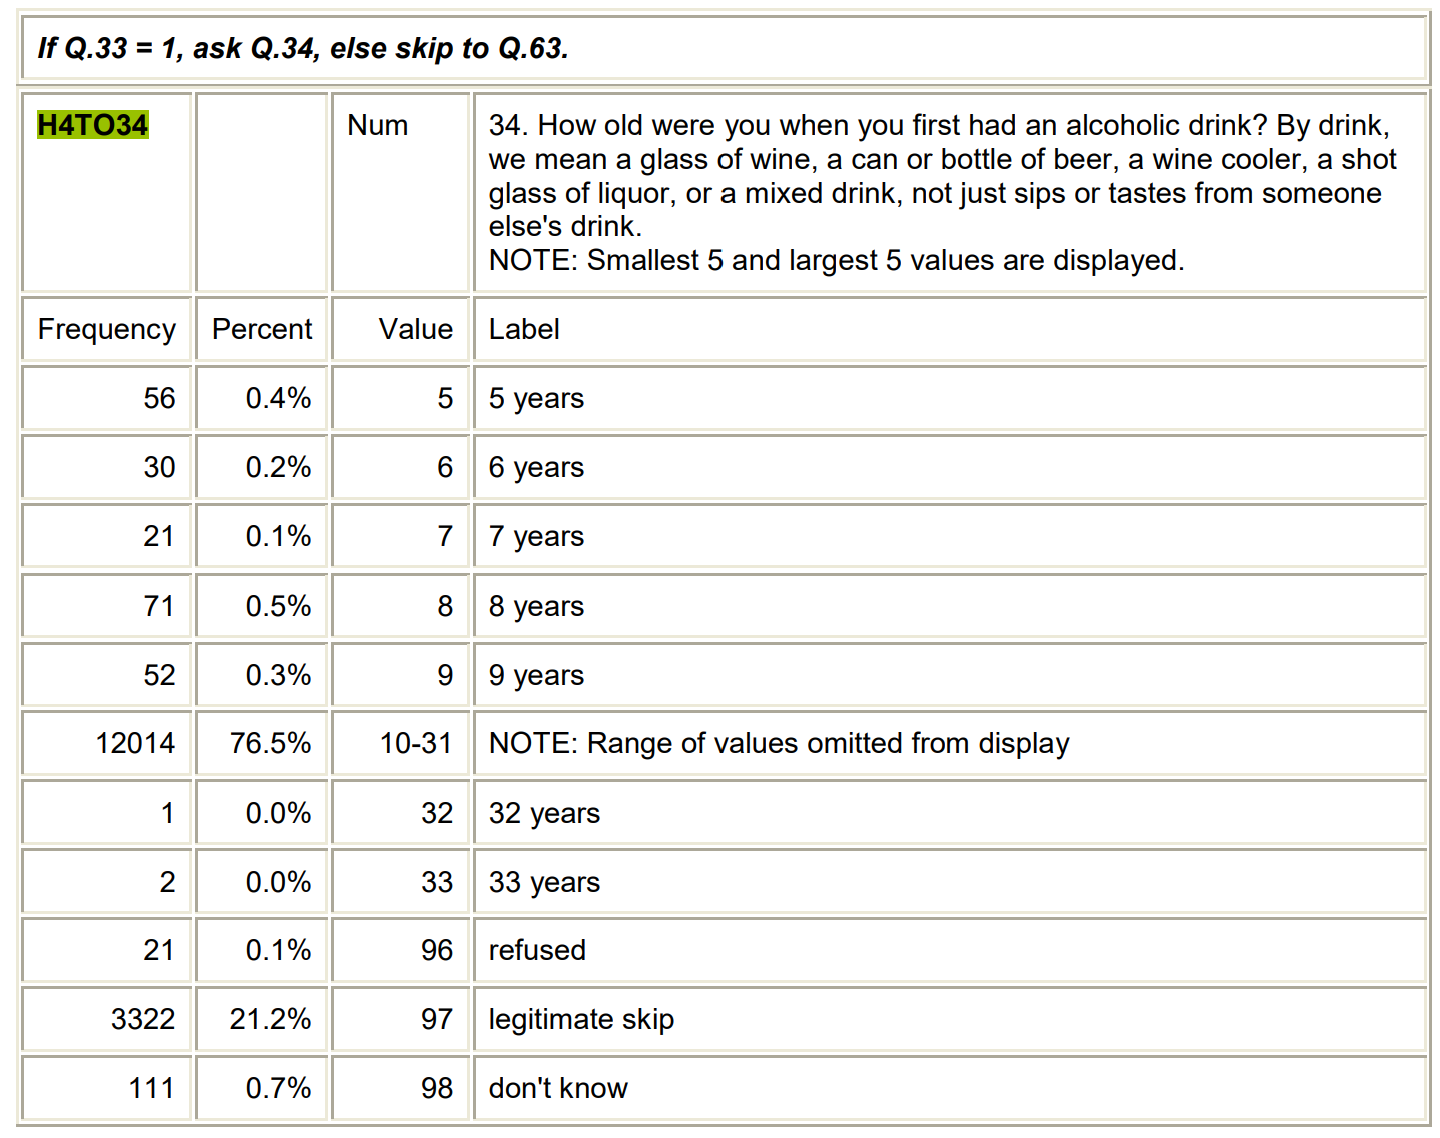

In [ ]:
df['first_drink'] = df['H4TO34']
df['first_drink'] = pd.to_numeric( df['first_drink'] , errors ='coerce')
df['first_drink'] = df['first_drink'].loc[ df['first_drink'] < 96]
df['first_drink'].describe()

In [ ]:
sns.histplot(x = 'first_drink' , data = df, bins= 20)
plt.axvline(x = 16.4, color = 'red' , linestyle = '--')

In [ ]:
sns.boxplot(x = 'first_drink' , data = df, showmeans = True)

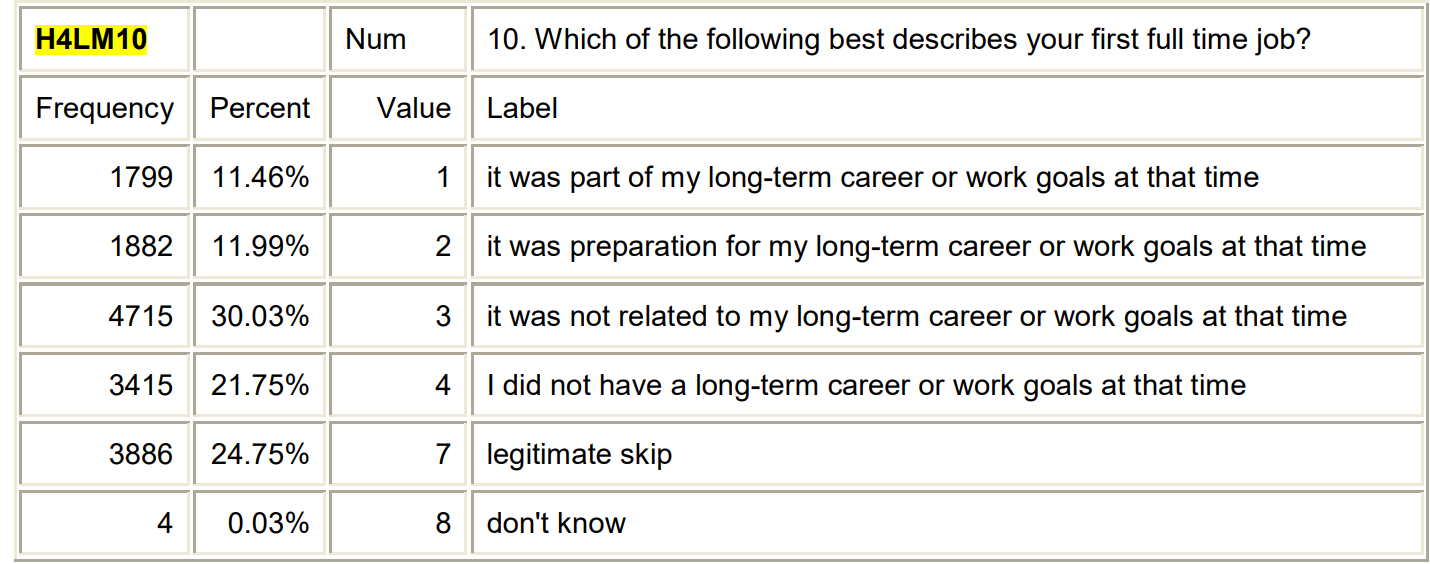

In [ ]:
df['first_job'] = df['H4LM10']
df['first_job'] = df['first_job'].loc[df['first_job'] !=' ' ]
df['first_job'] = df['first_job'].loc[df['first_job'] !='7' ]
df['first_job'] = df['first_job'].loc[df['first_job'] !='8' ]
df['first_job'].replace( ['1','2','3','4'] , ['Part of long term career','Prep for long term career','Not Related to career', 'I did not have long term goals'], inplace = True)
df['first_job'].value_counts()

In [ ]:
rp.summary_cat(df['first_job'])

In [ ]:
df['first_job'].value_counts().plot(kind ='pie')
plt.title("Which of the following describes your first job")

# **Bivariate Data**

In [ ]:
df.groupby('first_job')['first_drink'].agg(['count','mean','std']).round(1)

In [ ]:
rp.summary_cont(df.groupby('first_job')['first_drink']).round(1)

*Bivariate Graphs*

In [ ]:
sns.boxplot(y = 'first_job' , x ='first_drink' , data = df, showmeans = True)
plt.axvline(x = 16.4, color = 'red' , linestyle = '-')

In [ ]:
sns.pointplot(y = 'first_job' , x ='first_drink' , data = df, capsize=0.5, join = False)
plt.axvline(x = 16.4, color = 'red' , linestyle = ':')

*Hypothesis Test*

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [ ]:
model = ols('first_drink  ~ C(first_job)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=1)
aov_table

*Multi-comparison Test*

In [ ]:
import statsmodels.stats.multicomp as multi


In [ ]:
sub = df[['first_drink','first_job']].dropna()
mc1 = multi.MultiComparison(sub['first_drink'], sub['first_job'])
res = mc1.tukeyhsd()
print(res.summary())

In [ ]:
res.plot_simultaneous(ylabel= "first_job", xlabel= "Age of the first drink")